In [13]:
#importing useful tools in our code
import pandas as pd 
import numpy as np 
import math

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [14]:
# reading the data into a list 
dataframe = pd.read_csv("data.csv")
print ( len(dataframe) )
dataframe.head()

863


,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [15]:
#splitting the data into Training (80%) and Testing (15%)
x = dataframe.iloc[:, 1:13]
y = dataframe.iloc[:,14]
xTrain , xTest , yTrain , yTest = train_test_split(x,y,random_state=4,test_size=0.15,shuffle = True) 

In [16]:
#Scaling the parameters to make sure that there priorities are equal
#sc_x = Normalizer()
#type(xTrain)
transformer = Normalizer().fit(xTrain)
xTrain = transformer.transform(xTrain)
#type(xTrain)

#xTrain = sc_x.fit_transform(xTrain)
#xTest = sc_x.fit_transform(xTest)
#xTrain

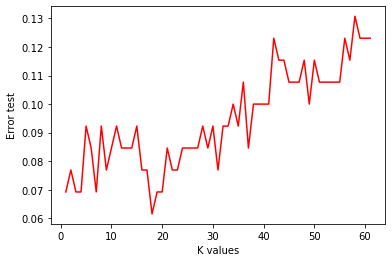

In [17]:
error = []
acc_train = []
k_vals = []
for i in range (61):
    model = KNeighborsClassifier (n_neighbors=i+1 , p=2 , metric='minkowski')
    model.fit(xTrain , yTrain)
    ypredict = model.predict(xTest)
   # ypredict1 = model.predict(xTrain)
    accTest = f1_score(ypredict,yTest)
    #accTrain = f1_score(ypredict1,yTrain)
    k_vals.append(i+1)
    error.append(np.mean(ypredict != yTest))
    #acc_train.append(accTrain)

fig , ax = plt.subplots()
ax.set_xlabel("K values")
ax.set_ylabel("Error test")
ax.plot(k_vals,error,'r-')

In [18]:
#determining the K using the result of the square root of the number of data
#K = math.floor( math.sqrt( (len (dataframe)/2 ) ) )
#if K %2 == 0:
#  K-=1
#K
Min = 100
for i in error:
    if i < Min:
        Min = i
j=error.index(Min)+1
if j %2 == 0:
    j-=1
    
K=k_vals[j+1]
K  

19

In [19]:
#initializing the model then fitting it 
knnmodel = KNeighborsClassifier (n_neighbors=K ,p=2, metric='minkowski')
knnmodel.fit(xTrain , yTrain)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [20]:
#predict the result of the model
yPred = knnmodel.predict(xTest)
yPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
#f1_score 
print (classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.90      0.53      0.67        17

    accuracy                           0.93       130
   macro avg       0.92      0.76      0.81       130
weighted avg       0.93      0.93      0.92       130



In [22]:
#the precision_score is tp/(tp + fp) then the best value is 1 it happens when fp = 0
print (precision_score(yTest,yPred))

0.9


In [23]:
print (recall_score(yTest,yPred))

0.5294117647058824


In [24]:
print (accuracy_score(yTest,yPred))

0.9307692307692308


In [25]:
print (f1_score(yTest,yPred))

0.6666666666666667


In [26]:
print (roc_auc_score(yTest,yPred))

0.7602811035918792
